In [71]:
import pandas as pd
import numpy as np
import yfinance as yf

nvda = yf.Ticker("NVDA")

df = nvda.history(period="1Y")
df.head()
df = df.reset_index()

Text(0, 0.5, 'Opening Price ($)')

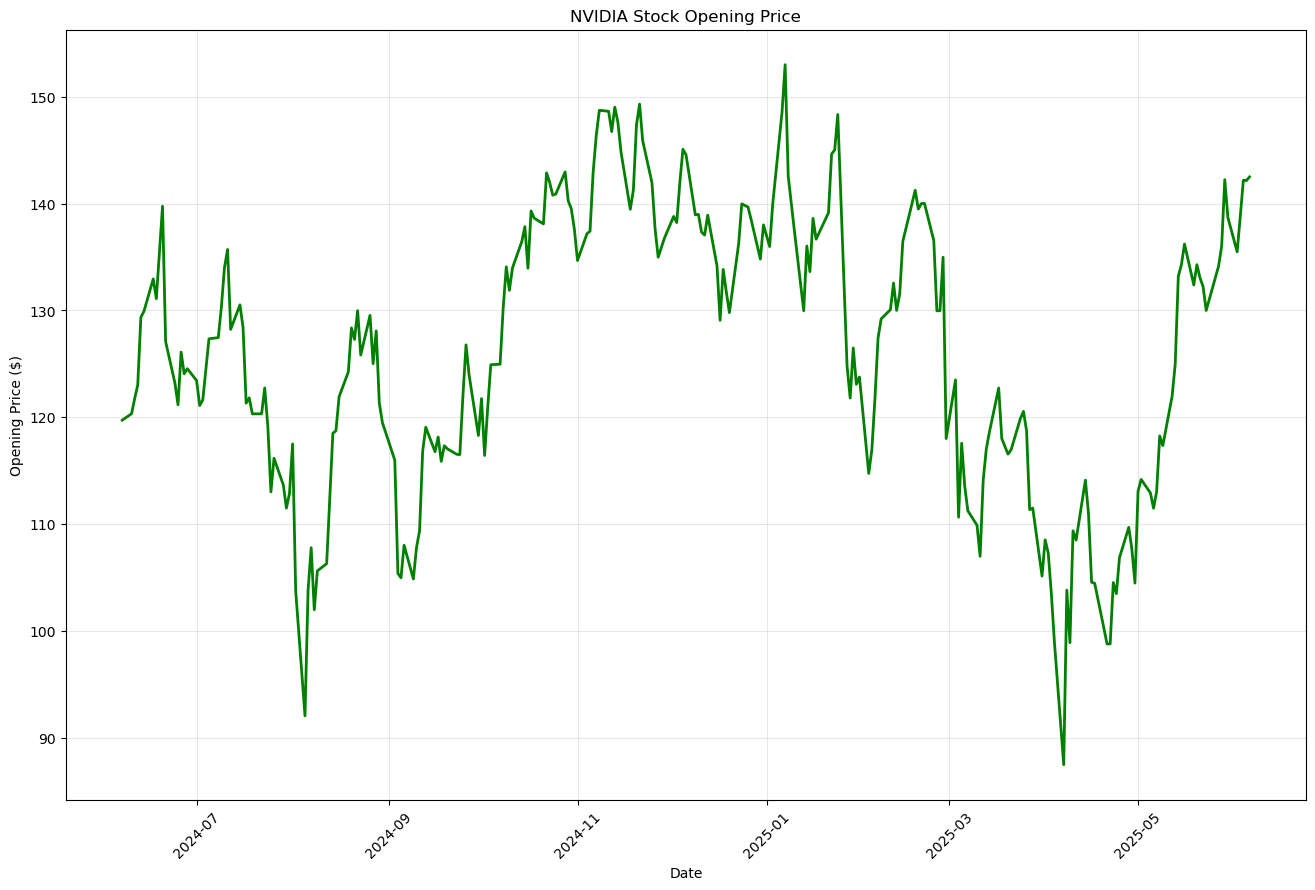

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

plt.plot(df.Date, df['Open'], color='Green', linewidth=2)
plt.xticks(rotation=45)

plt.grid(True, alpha=0.3)

plt.title('NVIDIA Stock Opening Price')
plt.xlabel('Date')
plt.ylabel('Opening Price ($)')

In [73]:
df = df.drop('Dividends', axis='columns')
df = df.drop('Stock Splits', axis='columns')
df['Close_1'] = df['Close'].shift(1)
df['Close_2'] = df['Close'].shift(2)

In [74]:
df['SMA_5'] = df['Close'].rolling(5).mean()
df['SMA_10'] = df['Close'].rolling(10).mean()
df['SMA_25'] = df['Close'].rolling(25).mean()
df['SMA_50'] = df['Close'].rolling(50).mean()

In [75]:
df['Return_1'] = df['Close'].pct_change(1) 
df['Return_5'] = df['Close'].pct_change(5)
df['Return_10'] = df['Close'].pct_change(10)

In [76]:
df = df.dropna()
df['Target'] = df['Close'].shift(-1)
df = df.dropna() 

In [77]:
from sklearn.model_selection import train_test_split

features = ['Close_1', 'Close_2', 'SMA_5', 'SMA_10', 'SMA_25', 'SMA_50', 'Return_1', 'Return_5', 'Return_10']
X = df[features]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [78]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

Prediction = model.predict(X_test)

Text(0, 0.5, 'Opening Price ($)')

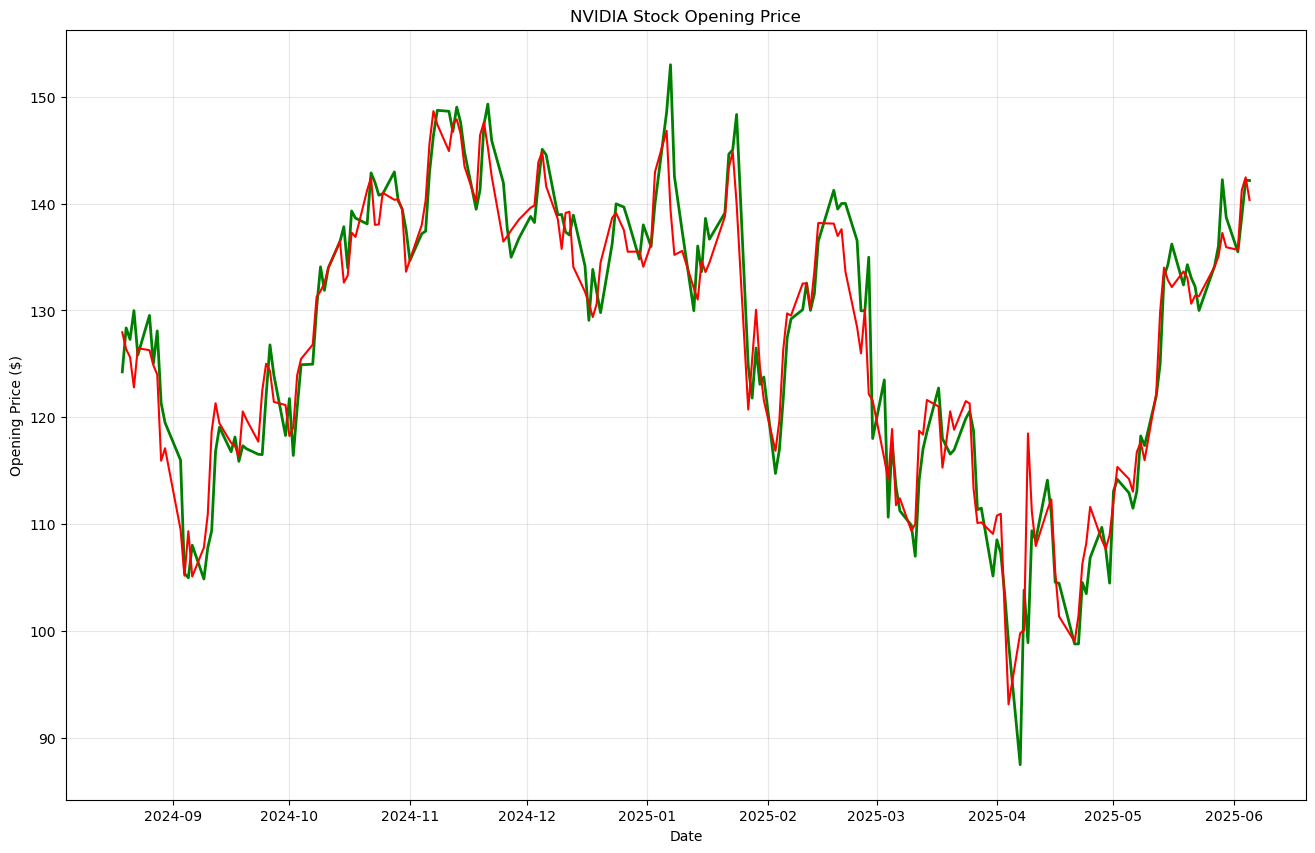

In [79]:
plt.figure(figsize=(16, 10))

plt.plot(df.Date, df['Open'], color='Green', linewidth=2)
plt.plot(df.Date, model.predict(X), color='Red',  linewidth=1.5 )

plt.grid(True, alpha=0.3)

plt.title('NVIDIA Stock Opening Price')
plt.xlabel('Date')
plt.ylabel('Opening Price ($)')